In [7]:
import matplotlib.pyplot as plt

In [23]:
part= "part-0"
k1 =11779
a = """0.85-0-tc-nets.pickle 621
0.8699999999999999-0-tc-nets.pickle 534
0.89-0-tc-nets.pickle 450
0.9099999999999999-0-tc-nets.pickle 354
0.93-0-tc-nets.pickle 289
0.95-0-tc-nets.pickle 210
0.2-0-tc-nets.pickle 4272
0.4-0-tc-nets.pickle 3207
0.6-0-tc-nets.pickle 2101"""

In [24]:
def convert_output(output):
    res3 = dict()
    for r in output.split('\n'):
        g = float(r.split('-')[0])
        siz=int(r.split(' ')[-1])
        res3[g] = siz
    
    return dict(sorted(res3.items()))
    

In [25]:
res = convert_output(output=a)

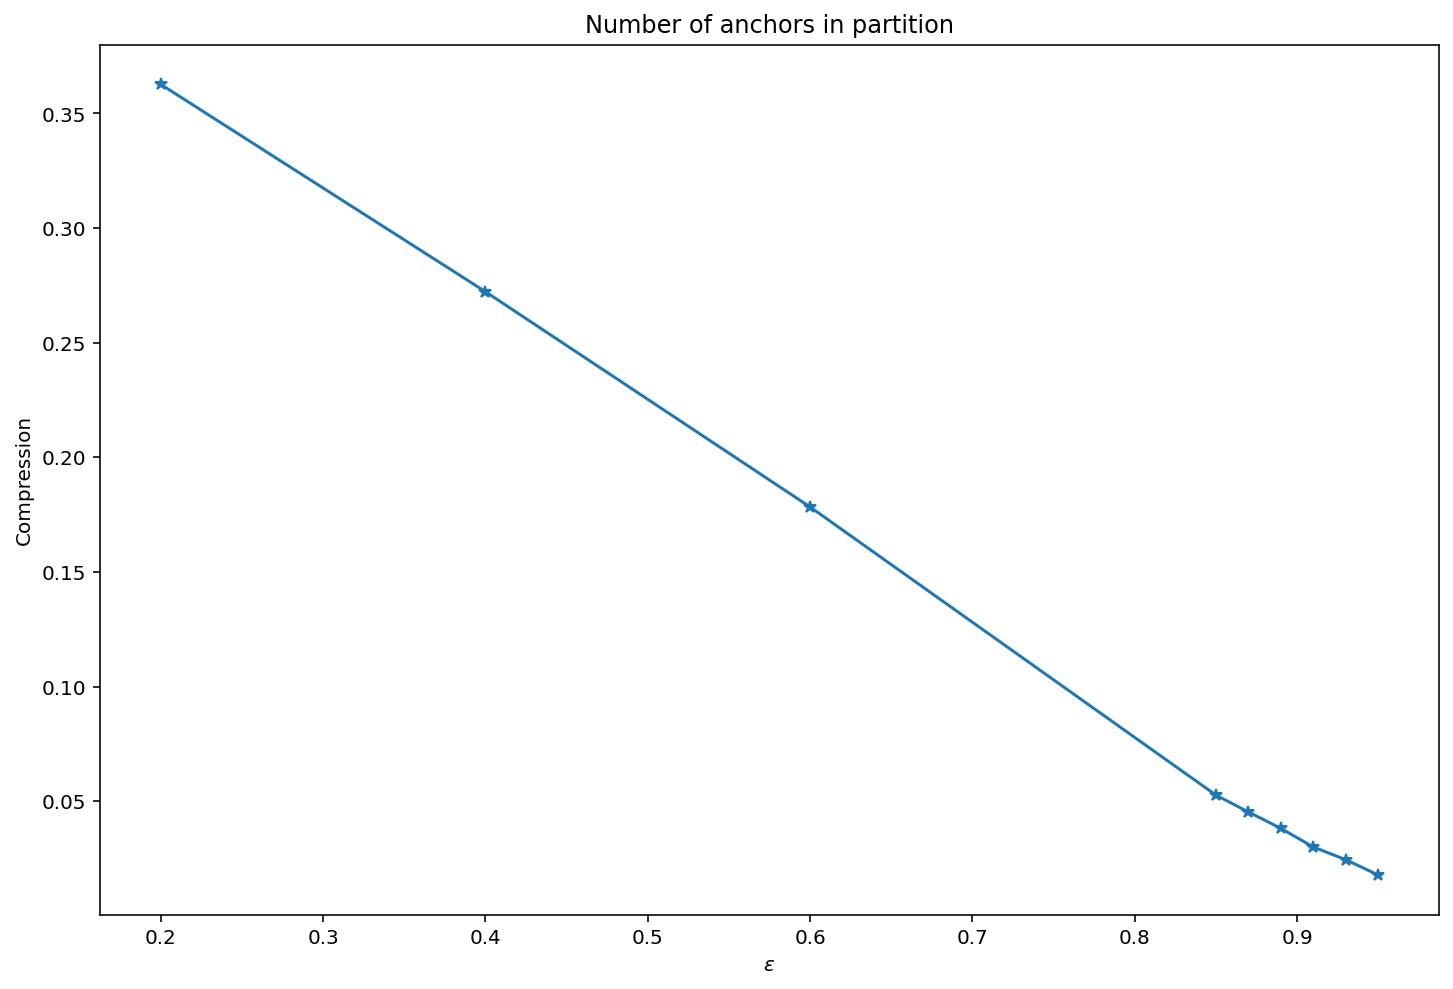

In [26]:
plt.figure(figsize=(12,8))
plt.title(f"Number of anchors in partition")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");

## two partitions merged together

In [15]:
b = """0.8-1-tc-nets.pickle 1204
0.95-1-tc-nets.pickle 249
0.8699999999999999-1-tc-nets.pickle 730
0.93-1-tc-nets.pickle 332
0.9099999999999999-1-tc-nets.pickle 464
0.89-1-tc-nets.pickle 593
0.85-1-tc-nets.pickle 867
0.6-1-tc-nets.pickle 3255
0.2-1-tc-nets.pickle 7442
0.4-1-tc-nets.pickle 5404"""
k2=23558

In [17]:
res2 = convert_output(b)

## Part 4 results

In [28]:
c="""0.85-1-tc-nets.pickle 1182
0.89-1-tc-nets.pickle 774
0.8-1-tc-nets.pickle 1722
0.4-1-tc-nets.pickle 9012
0.6-1-tc-nets.pickle 5092
0.2-1-tc-nets.pickle 12796
0.93-1-tc-nets.pickle 442
0.9099999999999999-1-tc-nets.pickle 583
0.8699999999999999-1-tc-nets.pickle 969
0.95-1-tc-nets.pickle 307"""
k3 = 47116

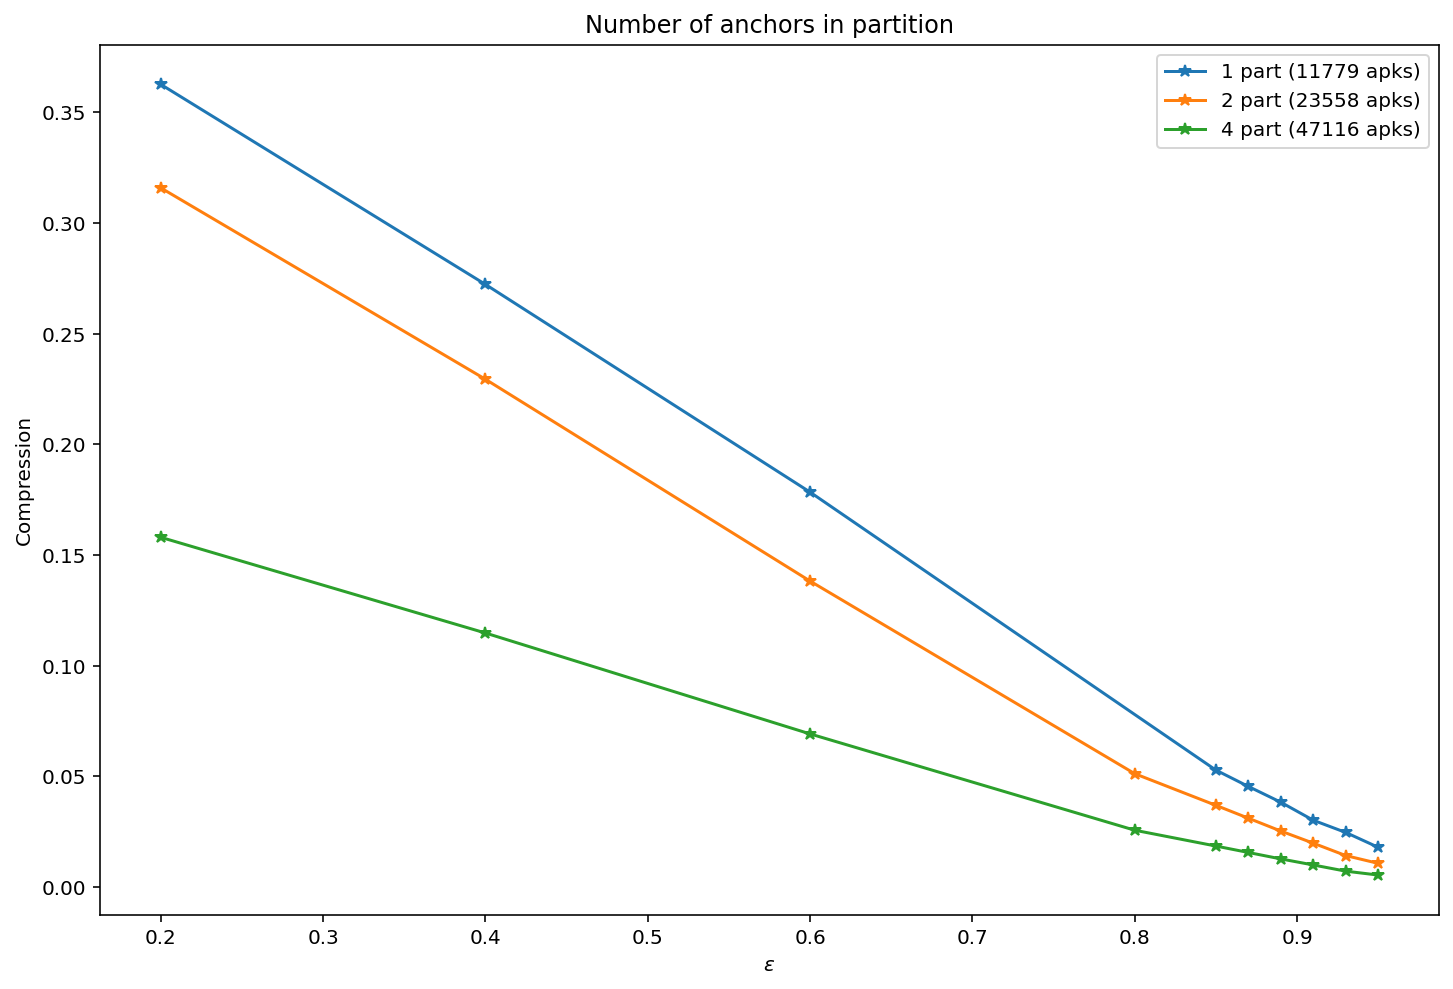

In [30]:
plt.figure(figsize=(12,8))
plt.title(f"Number of anchors in partition")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label=f"2 part ({k2} apks)");
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"4 part ({k3} apks)");


plt.legend();


In [29]:
res3 = convert_output(c)